In [449]:
import numpy as np
import pandas as pd

In [450]:
Dataset=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",header=None)
Dataset.columns=["Age","Sexe","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

In [451]:
Dataset

,Age,Sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [452]:
Data=Dataset.replace('?', np.NaN).copy()
Data["thal"]=Data["thal"].astype("float64")
Data["ca"]=Data["ca"].astype("float64")

In [453]:
Data.dtypes

Age         float64
Sexe        float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [454]:
Data=Data.dropna()
Data

,Age,Sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [455]:
Data["thal"].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

In [456]:
# Recodage Variable
def Target(x):
    if x==1 or x==2 or x==3 or x==4:
        return "Oui"
    else:
        return "Non"
    
def sex(x):
    if x==float(0):
        return "Femme"
    else:
        return "Homme"

def cp(x):
    if x==1:
        return "Angine stable"
    elif x==2:
        return "Angine Instable"
    elif x==3:
        return "Autres douleurs"
    else:
        return "Asymptomatique"
    
def fbs(x):
    if x==0:
        return "Non"
    else:
        return "Oui"
    
def restecg(x):
    if x==0:
        return "Normal"
    elif x==1:
        return "Anomalies"
    else:
        return "Hypertrophie"
    
def exang(x):
    if x==0:
        return "Non"
    else:
        return "Oui"
    
def slope(x):
    if x==1:
        return "En Hausse"
    elif x==2:
        return "Stable"
    else:
        return "En Baisse"
    
def ca(x):
    if x==0:
        return "Absence d'Anomalie"
    elif x==1:
        return "Faible"
    elif x==2:
        return "Moyen"
    else:
        return "Elevé"
    
def thal(x):
    if x==float(3):
        return "Non"
    elif x==float(6):
        return "Thalassémie sous contrôle"
    else:
        return "Thalassémie instable"
    


In [457]:
Data["Sexe"]=Data["Sexe"].apply(sex)
Data["cp"]=Data["cp"].apply(cp)
Data["target"]=Data["target"].apply(Target)
Data["fbs"]=Data["fbs"].apply(fbs)
Data["restecg"]=Data["restecg"].apply(restecg)
Data["exang"]=Data["exang"].apply(exang)
Data["slope"]=Data["slope"].apply(slope)
Data["ca"]=Data["ca"].apply(ca)
Data["thal"]=Data["thal"].apply(thal)


In [458]:
Data

,Age,Sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Homme,Angine stable,145.0,233.0,Oui,Hypertrophie,150.0,Non,2.3,En Baisse,Absence d'Anomalie,Thalassémie sous contrôle,Non
1,67.0,Homme,Asymptomatique,160.0,286.0,Non,Hypertrophie,108.0,Oui,1.5,Stable,Elevé,Non,Oui
2,67.0,Homme,Asymptomatique,120.0,229.0,Non,Hypertrophie,129.0,Oui,2.6,Stable,Moyen,Thalassémie instable,Oui
3,37.0,Homme,Autres douleurs,130.0,250.0,Non,Normal,187.0,Non,3.5,En Baisse,Absence d'Anomalie,Non,Non
4,41.0,Femme,Angine Instable,130.0,204.0,Non,Hypertrophie,172.0,Non,1.4,En Hausse,Absence d'Anomalie,Non,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,Femme,Asymptomatique,140.0,241.0,Non,Normal,123.0,Oui,0.2,Stable,Absence d'Anomalie,Thalassémie instable,Oui
298,45.0,Homme,Angine stable,110.0,264.0,Non,Normal,132.0,Non,1.2,Stable,Absence d'Anomalie,Thalassémie instable,Oui
299,68.0,Homme,Asymptomatique,144.0,193.0,Oui,Normal,141.0,Non,3.4,Stable,Moyen,Thalassémie instable,Oui
300,57.0,Homme,Asymptomatique,130.0,131.0,Non,Normal,115.0,Oui,1.2,Stable,Faible,Thalassémie instable,Oui


In [368]:
Data.describe()

,Age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [376]:
Data["slope"].value_counts()

En Hausse    139
Stable       137
En Baisse     21
Name: slope, dtype: int64

In [371]:
Data["restecg"].value_counts()

Normal          147
Hypertrophie    146
Anomalies         4
Name: restecg, dtype: int64

In [369]:
Data["cp"].value_counts()/np.sum(Data["cp"].value_counts())

Asymptomatique     0.478114
Autres douleurs    0.279461
Angine Instable    0.164983
Angine stable      0.077441
Name: cp, dtype: float64

In [263]:
Data["target"].value_counts()

Non    160
Oui    137
Name: target, dtype: int64

<h1> <center>  Quelques Graphiques </h1> </center>

<h1> <center> Modèle de Régression Logistique </h1> </center>

In [377]:
# Modèle de Régression Logistique

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, accuracy_score,roc_curve,plot_roc_curve


In [378]:
Data

,Age,Sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Homme,Angine stable,145.0,233.0,Oui,Hypertrophie,150.0,Non,2.3,En Baisse,Absence d'Anomalie,Thalassémie sous contrôle,Non
1,67.0,Homme,Asymptomatique,160.0,286.0,Non,Hypertrophie,108.0,Oui,1.5,Stable,Elevé,Non,Oui
2,67.0,Homme,Asymptomatique,120.0,229.0,Non,Hypertrophie,129.0,Oui,2.6,Stable,Moyen,Thalassémie instable,Oui
3,37.0,Homme,Autres douleurs,130.0,250.0,Non,Normal,187.0,Non,3.5,En Baisse,Absence d'Anomalie,Non,Non
4,41.0,Femme,Angine Instable,130.0,204.0,Non,Hypertrophie,172.0,Non,1.4,En Hausse,Absence d'Anomalie,Non,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,Femme,Asymptomatique,140.0,241.0,Non,Normal,123.0,Oui,0.2,Stable,Absence d'Anomalie,Thalassémie instable,Oui
298,45.0,Homme,Angine stable,110.0,264.0,Non,Normal,132.0,Non,1.2,Stable,Absence d'Anomalie,Thalassémie instable,Oui
299,68.0,Homme,Asymptomatique,144.0,193.0,Oui,Normal,141.0,Non,3.4,Stable,Moyen,Thalassémie instable,Oui
300,57.0,Homme,Asymptomatique,130.0,131.0,Non,Normal,115.0,Oui,1.2,Stable,Faible,Thalassémie instable,Oui


In [466]:
DataTest=Data.copy()
DataTest

,Age,Sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,Homme,Angine stable,145.0,233.0,Oui,Hypertrophie,150.0,Non,2.3,En Baisse,Absence d'Anomalie,Thalassémie sous contrôle,Non
1,67.0,Homme,Asymptomatique,160.0,286.0,Non,Hypertrophie,108.0,Oui,1.5,Stable,Elevé,Non,Oui
2,67.0,Homme,Asymptomatique,120.0,229.0,Non,Hypertrophie,129.0,Oui,2.6,Stable,Moyen,Thalassémie instable,Oui
3,37.0,Homme,Autres douleurs,130.0,250.0,Non,Normal,187.0,Non,3.5,En Baisse,Absence d'Anomalie,Non,Non
4,41.0,Femme,Angine Instable,130.0,204.0,Non,Hypertrophie,172.0,Non,1.4,En Hausse,Absence d'Anomalie,Non,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,Femme,Asymptomatique,140.0,241.0,Non,Normal,123.0,Oui,0.2,Stable,Absence d'Anomalie,Thalassémie instable,Oui
298,45.0,Homme,Angine stable,110.0,264.0,Non,Normal,132.0,Non,1.2,Stable,Absence d'Anomalie,Thalassémie instable,Oui
299,68.0,Homme,Asymptomatique,144.0,193.0,Oui,Normal,141.0,Non,3.4,Stable,Moyen,Thalassémie instable,Oui
300,57.0,Homme,Asymptomatique,130.0,131.0,Non,Normal,115.0,Oui,1.2,Stable,Faible,Thalassémie instable,Oui


In [467]:
DataTest["thal"].value_counts()

Non                          164
Thalassémie instable         115
Thalassémie sous contrôle     18
Name: thal, dtype: int64

In [468]:
len(DataTest.transpose())

14

In [469]:
pd.DataFrame(DataTest.iloc[-1,:]).transpose()

,Age,Sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57.0,Femme,Angine Instable,130.0,236.0,Non,Hypertrophie,174.0,Non,0.0,Stable,Faible,Non,Oui


In [470]:
pd.get_dummies(DataTest[3:10],columns=['Sexe',"cp","fbs","restecg","exang","slope","ca","thal","target"], drop_first=True)

,Age,trestbps,chol,thalach,oldpeak,Sexe_Homme,cp_Asymptomatique,cp_Autres douleurs,fbs_Oui,restecg_Normal,exang_Oui,slope_En Hausse,slope_Stable,ca_Faible,ca_Moyen,thal_Thalassémie instable,target_Oui
3,37.0,130.0,250.0,187.0,3.5,1,0,1,0,1,0,0,0,0,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,0,0,0,0,1,0,0,0,0,0
5,56.0,120.0,236.0,178.0,0.8,1,0,0,0,1,0,1,0,0,0,0,0
6,62.0,140.0,268.0,160.0,3.6,0,1,0,0,0,0,0,0,0,1,0,1
7,57.0,120.0,354.0,163.0,0.6,0,1,0,0,1,1,1,0,0,0,0,0
8,63.0,130.0,254.0,147.0,1.4,1,1,0,0,0,0,0,1,1,0,1,1
9,53.0,140.0,203.0,155.0,3.1,1,1,0,1,0,1,0,0,0,0,1,1


In [471]:
DataClean = pd.get_dummies(DataTest, columns=['Sexe',"cp","fbs","restecg","exang","slope","ca","thal","target"], drop_first=True)


In [473]:
DataClean

,Age,trestbps,chol,thalach,oldpeak,Sexe_Homme,cp_Angine stable,cp_Asymptomatique,cp_Autres douleurs,fbs_Oui,...,restecg_Normal,exang_Oui,slope_En Hausse,slope_Stable,ca_Elevé,ca_Faible,ca_Moyen,thal_Thalassémie instable,thal_Thalassémie sous contrôle,target_Oui
0,63.0,145.0,233.0,150.0,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,1
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,1,0,0,1,1,0,1
3,37.0,130.0,250.0,187.0,3.5,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,123.0,0.2,0,0,1,0,0,...,1,1,0,1,0,0,0,1,0,1
298,45.0,110.0,264.0,132.0,1.2,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
299,68.0,144.0,193.0,141.0,3.4,1,0,1,0,1,...,1,0,0,1,0,0,1,1,0,1
300,57.0,130.0,131.0,115.0,1.2,1,0,1,0,0,...,1,1,0,1,0,1,0,1,0,1


In [474]:
X=DataClean.drop(columns=['target_Oui'])
y=DataClean["target_Oui"]

In [475]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [476]:
classifier = LogisticRegression(random_state = 0, penalty = 'none')
classifier.fit(X_train, y_train)

C:\Developpement\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none', random_state=0)

In [477]:
y_pred = classifier.predict(X_train)
accuracy_score(y_train, y_pred)


0.8734177215189873

In [478]:
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.8333333333333334

<h1> <center> Matrice de Confusion </h1> </center>

In [479]:
y_test

169    0
214    1
63     0
155    1
5      0
77     0
185    0
159    0
9      1
140    0
290    1
78     0
93     0
102    0
42     0
225    0
288    0
33     0
267    1
149    0
248    1
45     1
60     1
46     0
282    1
240    0
177    1
237    1
17     0
283    0
112    0
222    0
24     1
82     0
7      0
75     0
109    1
84     0
91     1
73     1
117    0
127    1
236    1
59     0
198    0
211    1
98     0
187    1
178    0
125    0
94     0
299    1
184    1
279    0
195    1
297    1
25     0
227    0
6      1
183    0
Name: target_Oui, dtype: uint8

In [480]:
DataTest.iloc[165:170]

,Age,Sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
167,54.0,Femme,Angine Instable,132.0,288.0,Oui,Hypertrophie,159.0,Oui,0.0,En Hausse,Faible,Non,Non
168,35.0,Homme,Asymptomatique,126.0,282.0,Non,Hypertrophie,156.0,Oui,0.0,En Hausse,Absence d'Anomalie,Thalassémie instable,Oui
169,45.0,Femme,Angine Instable,112.0,160.0,Non,Normal,138.0,Non,0.0,Stable,Absence d'Anomalie,Non,Non
170,70.0,Homme,Autres douleurs,160.0,269.0,Non,Normal,112.0,Oui,2.9,Stable,Faible,Thalassémie instable,Oui
171,53.0,Homme,Asymptomatique,142.0,226.0,Non,Hypertrophie,111.0,Oui,0.0,En Hausse,Absence d'Anomalie,Thalassémie instable,Non


In [481]:
DataTest["cp"].value_counts()

Asymptomatique     142
Autres douleurs     83
Angine Instable     49
Angine stable       23
Name: cp, dtype: int64

In [482]:
X_test.iloc[0:1]

,Age,trestbps,chol,thalach,oldpeak,Sexe_Homme,cp_Angine stable,cp_Asymptomatique,cp_Autres douleurs,fbs_Oui,restecg_Hypertrophie,restecg_Normal,exang_Oui,slope_En Hausse,slope_Stable,ca_Elevé,ca_Faible,ca_Moyen,thal_Thalassémie instable,thal_Thalassémie sous contrôle
169,45.0,112.0,160.0,138.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


C:\Developpement\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


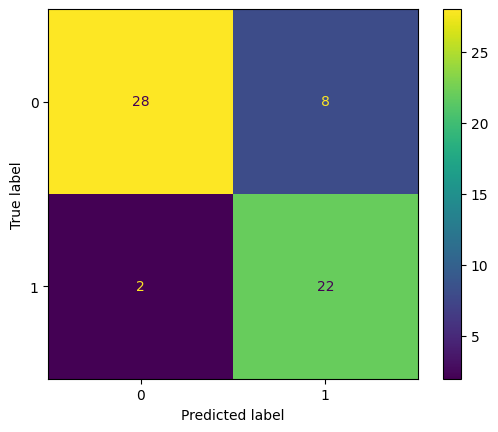

In [483]:
plot_confusion_matrix(classifier,X_test,y_test)

<h1> <center> Plot ROC CURVE </center> </h1>

C:\Developpement\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


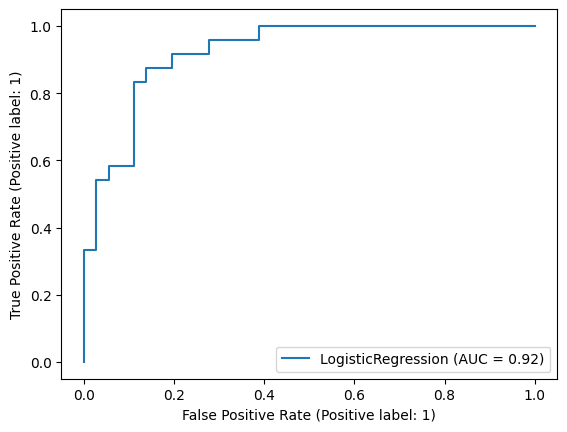

In [484]:
plot_roc_curve(classifier,X_test,y_test)

In [490]:
DataTest.iloc[210:218]

,Age,Sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
213,66.0,Femme,Asymptomatique,178.0,228.0,Oui,Normal,165.0,Oui,1.0,Stable,Moyen,Thalassémie instable,Oui
214,52.0,Homme,Asymptomatique,112.0,230.0,Non,Normal,160.0,Non,0.0,En Hausse,Faible,Non,Oui
215,56.0,Homme,Angine stable,120.0,193.0,Non,Hypertrophie,162.0,Non,1.9,Stable,Absence d'Anomalie,Thalassémie instable,Non
216,46.0,Femme,Angine Instable,105.0,204.0,Non,Normal,172.0,Non,0.0,En Hausse,Absence d'Anomalie,Non,Non
217,46.0,Femme,Asymptomatique,138.0,243.0,Non,Hypertrophie,152.0,Oui,0.0,Stable,Absence d'Anomalie,Non,Non
218,64.0,Femme,Asymptomatique,130.0,303.0,Non,Normal,122.0,Non,2.0,Stable,Moyen,Non,Non
219,59.0,Homme,Asymptomatique,138.0,271.0,Non,Hypertrophie,182.0,Non,0.0,En Hausse,Absence d'Anomalie,Non,Non
220,41.0,Femme,Autres douleurs,112.0,268.0,Non,Hypertrophie,172.0,Oui,0.0,En Hausse,Absence d'Anomalie,Non,Non


In [486]:
X_test

,Age,trestbps,chol,thalach,oldpeak,Sexe_Homme,cp_Angine stable,cp_Asymptomatique,cp_Autres douleurs,fbs_Oui,restecg_Hypertrophie,restecg_Normal,exang_Oui,slope_En Hausse,slope_Stable,ca_Elevé,ca_Faible,ca_Moyen,thal_Thalassémie instable,thal_Thalassémie sous contrôle
169,45.0,112.0,160.0,138.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
214,52.0,112.0,230.0,160.0,0.0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0
63,54.0,135.0,304.0,170.0,0.0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0
155,70.0,130.0,322.0,109.0,2.4,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0
5,56.0,120.0,236.0,178.0,0.8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
77,51.0,140.0,308.0,142.0,1.5,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
185,63.0,140.0,195.0,179.0,0.0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
159,68.0,118.0,277.0,151.0,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
9,53.0,140.0,203.0,155.0,3.1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0
140,59.0,140.0,221.0,164.0,0.0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0


In [487]:
test_prob = classifier.predict_proba(X_test)
test_pred = classifier.predict(X_test)

In [488]:
test_prob

array([[0.94406343, 0.05593657],
       [0.35758602, 0.64241398],
       [0.99457893, 0.00542107],
       [0.03606357, 0.96393643],
       [0.94330487, 0.05669513],
       [0.42884154, 0.57115846],
       [0.85638562, 0.14361438],
       [0.37045832, 0.62954168],
       [0.13829674, 0.86170326],
       [0.90606464, 0.09393536],
       [0.69731244, 0.30268756],
       [0.86555371, 0.13444629],
       [0.99248827, 0.00751173],
       [0.48491147, 0.51508853],
       [0.56758063, 0.43241937],
       [0.98007992, 0.01992008],
       [0.79705872, 0.20294128],
       [0.42898173, 0.57101827],
       [0.41670119, 0.58329881],
       [0.93578439, 0.06421561],
       [0.07952055, 0.92047945],
       [0.1437609 , 0.8562391 ],
       [0.30212548, 0.69787452],
       [0.93199052, 0.06800948],
       [0.01918558, 0.98081442],
       [0.89795785, 0.10204215],
       [0.01554238, 0.98445762],
       [0.32151769, 0.67848231],
       [0.65139598, 0.34860402],
       [0.92395537, 0.07604463],
       [0.

In [319]:
test_prob

array([0.03730841, 0.33744051, 0.00708804, 0.92048479, 0.03578204,
       0.69988079, 0.14317198, 0.75807308, 0.66482585, 0.12837282,
       0.53781205, 0.11738486, 0.01169129, 0.28579946, 0.43245299,
       0.01113796, 0.23380415, 0.31444372, 0.59896764, 0.11314168,
       0.86313749, 0.90673441, 0.60058558, 0.13414548, 0.95926702,
       0.08208148, 0.98074342, 0.53187879, 0.12532707, 0.05369202,
       0.03193951, 0.00576057, 0.99554185, 0.15782323, 0.06958504,
       0.12507484, 0.63359232, 0.06465129, 0.92368583, 0.58316133,
       0.02724667, 0.98798002, 0.87598314, 0.94316779, 0.02477685,
       0.7889194 , 0.51920293, 0.85689825, 0.78862782, 0.04921979,
       0.01586276, 0.95012869, 0.05780178, 0.06668701, 0.96334932,
       0.5676025 , 0.0501858 , 0.13934181, 0.80961579, 0.93201934])

In [320]:
test_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=uint8)